In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf

In [2]:
#Reading the input files
train=[]
train_label=[]
tr_img=[]
tr_img_labels=[]
path = r"C:\Users\Asus\Documents\Python Codes\Assignments\Deep Learning\Assignment-3\Data\\"

for i in os.listdir(path+"train"):
  Flag=0
  for j in os.listdir(path+"train\\"+i):
    train.append(cv2.imread(path+"train\\"+i+"\\"+j, cv2.IMREAD_GRAYSCALE))
    train_label.append(int(i))
    if(Flag==0):
      tr_img.append(cv2.imread(path+"train\\"+i+"\\"+j, cv2.IMREAD_GRAYSCALE))
      tr_img_labels.append(int(i))
      Flag=1

train=np.array(train)
train_label=np.array(train_label)
tr_img=np.array(tr_img)
tr_img_labels=np.array(tr_img_labels)

test=[]
test_label=[]
test_img=[]
test_img_labels=[]

for i in os.listdir(path+"test"):
  Flag=0
  for j in os.listdir(path+"test\\"+i):
    test.append(cv2.imread(path+"test\\"+i+"\\"+j, cv2.IMREAD_GRAYSCALE))
    test_label.append(int(i))
    if(Flag==0):
      test_img.append(cv2.imread(path+"test\\"+i+"\\"+j, cv2.IMREAD_GRAYSCALE))
      test_img_labels.append(int(i))
      Flag=1

test=np.array(test)
test_label=np.array(test_label)
test_img = np.array(test_img)
test_img_labels = np.array(test_img_labels)

validation=[]
validation_label=[]
val_img=[]
val_img_labels=[]

for i in os.listdir(path+"val"):
  Flag=0
  for j in os.listdir(path+"val\\"+i):
    validation.append(cv2.imread(path+"val\\"+i+"\\"+j, cv2.IMREAD_GRAYSCALE))
    validation_label.append(int(i))
    if(Flag==0):
      val_img.append(cv2.imread(path+"val\\"+i+"\\"+j, cv2.IMREAD_GRAYSCALE))
      val_img_labels.append(int(i))
      Flag=1

validation=np.array(validation)
validation_label=np.array(validation_label)
val_img = np.array(val_img)
val_img_labels = np.array(val_img_labels)

# Flattening the Input images
train1 = train.reshape(train.shape[0], -1)
validation1 = validation.reshape(validation.shape[0],-1)
test1 = test.reshape(test.shape[0],-1)

tr_img = tr_img.reshape(5,-1)
test_img = test_img.reshape(5,-1)
val_img = val_img.reshape(5,-1)

#Normalizing
train2 = train1.astype('float32') / 255
validation2 = validation1.astype('float32') / 255
test2 = test1.astype('float32') / 255
tr_img = tr_img.astype('float32') / 255
val_img = val_img.astype('float32') / 255
test_img = test_img.astype('float32') / 255

In [3]:
def Plotter(Original_img,recon_img):
    fig,axis=plt.subplots(5,2,figsize=(5,8))
    axis = axis.flatten()
    for i,j in enumerate([0,2,4,6,8]):
        axis[j].imshow(Original_img[i].reshape(28,28),cmap="gray")
        axis[j].axis('off')
        axis[j+1].imshow(recon_img[i].reshape(28,28),cmap="gray")
        axis[j+1].axis('off')

1 Hidden Layer AutoEncoder

In [4]:
input_shape = (784,)
input_layer = tf.keras.Input(shape=input_shape)
encoded_layer = tf.keras.layers.Dense(64, activation='tanh')(input_layer)
decoded_layer = tf.keras.layers.Dense(784, activation='linear')(encoded_layer)
autoencoder = tf.keras.models.Model(input_layer, decoded_layer)

autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
Callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1)

# Autoencoder = autoencoder.fit(train2, train2,epochs=50,verbose=0,batch_size=64,shuffle=True,callbacks=Callback)

# encoded_imgs = autoencoder.predict(test2)
# plt.plot(Autoencoder.history['loss'])
# Plotter(test2[0],encoded_imgs[0])

Encoder1 = tf.keras.models.Model(inputs=input_layer,outputs=encoded_layer) #used in Task 3

3 Hidden Layer AutoEncoder

In [5]:
# # Define input shape
# input_shape = (784,)

# # Define autoencoder architecture
# input_layer = tf.keras.Input(shape=input_shape)
# encoded_layer = tf.keras.layers.Dense(400, activation='tanh')(input_layer)
# encoded_layer = tf.keras.layers.Dense(256, activation='tanh')(encoded_layer)
# decoded_layer = tf.keras.layers.Dense(400, activation='tanh')(encoded_layer)
# decoded_layer2 = tf.keras.layers.Dense(784, activation='linear')(decoded_layer)

# # Define autoencoder model
# autoencoder2 = tf.keras.models.Model(input_layer, decoded_layer2)

# # Compile autoencoder model
# autoencoder2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# Callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1)
# Autoencoder2 = autoencoder2.fit(train2, train2,epochs=50,verbose=0,batch_size=32,shuffle=True,callbacks=Callback)

# # Use the autoencoder to encode and decode input data
# # Recon_imgs2 = autoencoder2.predict(test2)
# # Plotter(test2[0],Recon_imgs2[0])

# # Encoder2 = tf.keras.models.Model(inputs=input_layer,outputs=encoded_layer) # Used in Task 4

# # Plotting the Reconstructed Images
# # Recon_imgs = autoencoder2.predict(tr_img)
# # Plotter(tr_img,Recon_imgs)
# # Recon_imgs = autoencoder2.predict(val_img)
# # Plotter(val_img,Recon_imgs)
# # Recon_imgs = autoencoder2.predict(test_img)
# # Plotter(test_img,Recon_imgs)



In [6]:
def Reconstruction_Error():
    # Reconstructed Images
    recon_train_imgs = autoencoder.predict(train2)
    recon_val_imgs = autoencoder.predict(validation2)
    recon_test_imgs = autoencoder.predict(test2)

    # Reconstruction Error
    train_errors = np.mean(np.square(train2 - recon_train_imgs), axis=1)
    val_errors = np.mean(np.square(validation2 - recon_val_imgs), axis=1)
    test_errors = np.mean(np.square(test2 - recon_test_imgs), axis=1)

    # Average Reconstruction Error
    train_avg_error = np.mean(train_errors)
    val_avg_error = np.mean(val_errors)
    test_avg_error = np.mean(test_errors)

    print("Average reconstruction error for training data:", train_avg_error)
    print("Average reconstruction error for validation data:", val_avg_error)
    print("Average reconstruction error for test data:", test_avg_error)




# Task 3 & 4

In [7]:
Encoder1 = tf.keras.models.Model(inputs=input_layer,outputs=encoded_layer)
def FCNN_Classifier(Dimension,i,j,k,Flag):
    
    '''
    Flag=1 for Encoder 2 i.e 3 hidden Layer Encoder
    Flag=0 for Encoder 1 i.e 1 Hidden Layer Encoder

    '''
    # 1 Hidden Layer Encoder output
    Com1_test = Encoder1.predict(test2,verbose=0)
    Com1_train = Encoder1.predict(train2,verbose=0)
    Com1_val = Encoder1.predict(validation2,verbose=0)
    
    # 3 hidden Layer Encoder output
    # Com3_test = Encoder2.predict(test2,verbose=0)
    # Com3_train = Encoder2.predict(train2,verbose=0)
    # Com3_val = Encoder2.predict(validation2,verbose=0)
      
    initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=68)

    model3 = tf.keras.models.Sequential([
        tf.keras.Input(Dimension,name='Input_layer'),
        tf.keras.layers.Dense(i, activation='tanh',kernel_initializer=initializer,name='Hidden_layer-1'),
        tf.keras.layers.Dense(j, activation='tanh',kernel_initializer=initializer,name='Hidden_Layer-2'),
        tf.keras.layers.Dense(k, activation='tanh',kernel_initializer=initializer,name='Hidden_layer-3'),
        tf.keras.layers.Dense(10, activation='softmax',kernel_initializer=initializer,name='Output_layer')
    ])

    optimizer1 = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-08,name='Adam')
    model3.compile(optimizer=optimizer1,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    Callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1)
    
    if(Flag==1):
        predictions_3 = model3.fit(Com3_train, train_label, epochs=10000,verbose=0, batch_size=32, callbacks=Callback)
        val_acc = model3.evaluate(Com3_val, validation_label)[1]
        test_acc = model3.evaluate(Com3_test,test_label)[1]
        Predict = model3.predict(Com3_test, verbose=0)
        predictions = np.argmax(Predict, axis=1)
        cm = tf.math.confusion_matrix(test_label, predictions)
        print("/n",cm)
        # print("Validation accuracy : ", val_acc)
        print("Test Accuracy : ",test_acc)

    else:
        predictions_1=model3.fit(Com1_train, train_label, epochs=10000,verbose=0, batch_size=32, callbacks=Callback)
        val_acc = model3.evaluate(Com1_val, validation_label)[1]
        test_acc = model3.evaluate(Com1_test,test_label)[1]
        # Predict = model3.predict(Com1_test, verbose=0)
        # predictions = np.argmax(Predict, axis=1)
        # cm = tf.math.confusion_matrix(test_label, predictions)
        # print("/n",cm)
        print("Validation accuracy : ", val_acc)
        print("Test Accuracy : ",test_acc)

# Task 5
## Denoising Encoder

In [31]:
# # Noisy input

# # Add noise
# X_noisy_20 = train2 + 0.2 * np.random.normal(loc=0.0, scale=1.0, size=train2.shape)
# X_noisy_40 = train2 + 0.4 * np.random.normal(loc=0.0, scale=1.0, size=train2.shape)

# range = np.max(train2)-np.min(train2)
# stddev = range*0.4
# input_shape = (784,)
# input_layer = tf.keras.Input(shape=input_shape)
# # noisy_output = tf.keras.layers.GaussianNoise(stddev=stddev)(input_layer)
# encoded_layer = tf.keras.layers.Dense(64, activation='tanh')(input_layer)
# decoded_layer = tf.keras.layers.Dense(784, activation='linear')(encoded_layer)
# autoencoder = tf.keras.models.Model(input_layer, decoded_layer)

# autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# Callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1)
# autoencoder.fit(train2, train2,epochs=50,verbose=0,batch_size=64,shuffle=True,callbacks=Callback)

# # FCNN_Classifier(64,32,16,8,0)
# # Reconstruction_Error()
# # Plotting the Reconstructed Images
# # Recon_imgs = autoencoder.predict(tr_img)
# # Plotter(tr_img,Recon_imgs)
# # Recon_imgs = autoencoder.predict(val_img)
# # Plotter(val_img,Recon_imgs)
# # Recon_imgs = autoencoder.predict(test_img)
# # Plotter(test_img,Recon_imgs)


# Weight Visualization

(784, 64)


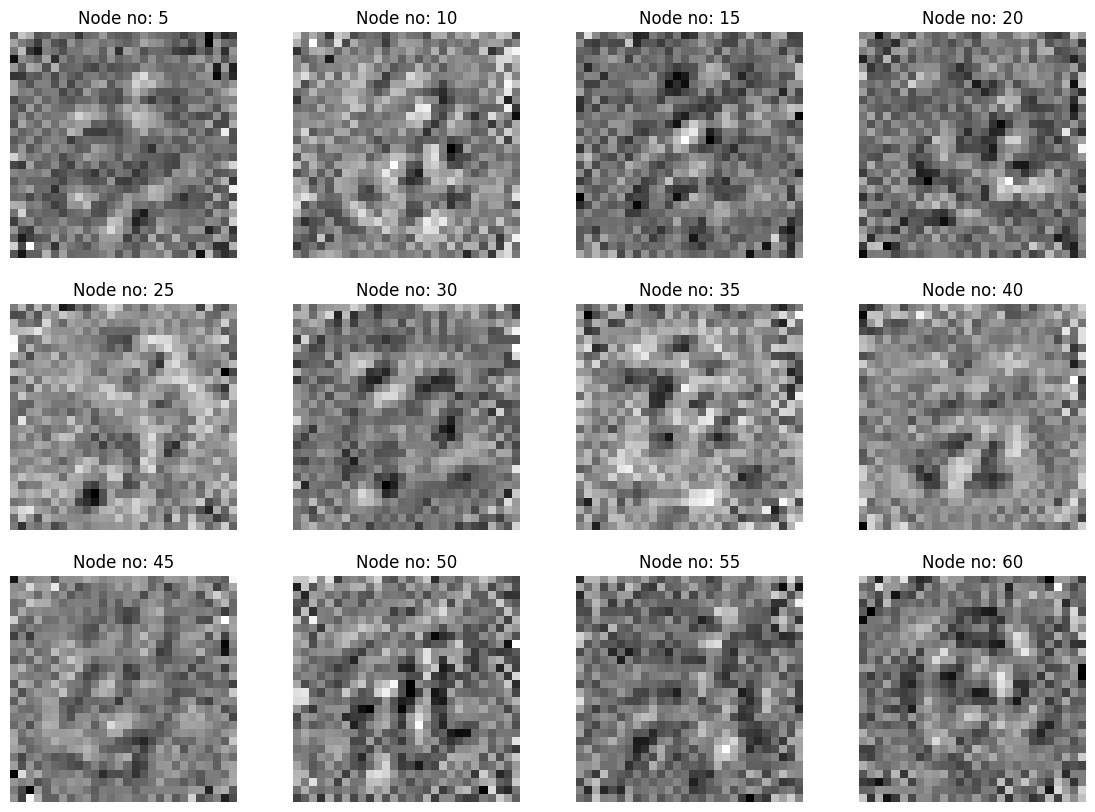

In [37]:
input_shape = (784,)
input_layer = tf.keras.Input(shape=input_shape)
encoded_layer = tf.keras.layers.Dense(64, activation='tanh')(input_layer)
decoded_layer = tf.keras.layers.Dense(784, activation='linear')(encoded_layer)
autoencoder = tf.keras.models.Model(input_layer, decoded_layer)

autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
Callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1)
autoencoder.fit(train2, train2,epochs=50,verbose=0,batch_size=64,shuffle=True,callbacks=Callback)

weights = autoencoder.layers[1].get_weights()
print(weights[0].shape)

w31 = []
for w in weights[0].T:
    w31.append(w.reshape(28, 28))
   
w31 = np.array(w31)
# print(len(w31))

n = int(12)
 
plt.figure(figsize=(14, 10))
k=[5,10,15,20,25,30,35,40,45,50,55,60]

for i in np.arange(n):
    ax = plt.subplot(3, 4, i+1)
    plt.title("Node no: "+str(k[i]))
    plt.imshow(w31[k[i]],cmap='gray')
    plt.axis('off')
plt.show()